In [78]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [79]:
import imageio

dir_path = 'data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/'
vol_arr = imageio.volread(dir_path, 'DICOM')

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 61/99  (61.699/99  (100.0%)


In [80]:
vol_arr.shape

(99, 512, 512)

In [81]:
vol = torch.from_numpy(vol_arr).float()
vol.shape

torch.Size([99, 512, 512])

In [82]:
vol = vol[None]
vol.shape

torch.Size([1, 99, 512, 512])

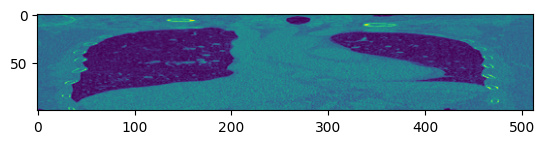

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[:, 200, :])  # 纵切面 vol_arr.shape [99,512,512]
plt.imshow(vol_arr[:, 200, :])  # 纵切面 vol_arr.shape [99,512,512]


In [84]:
import pandas as pd

wine_path = 'data/p1ch4/tabular-wine/winequality-white.csv'
df = pd.read_csv(wine_path)

In [85]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [86]:
wine_path = 'data/p1ch4/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [87]:
import csv

col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [88]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [89]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [90]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [91]:
target = target.long()
target

tensor([6, 6,  ..., 7, 6])

In [92]:
np.unique(target)

array([3, 4, 5, 6, 7, 8, 9])

In [93]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.shape

torch.Size([4898, 10])

In [94]:
target_onehot = target_onehot.scatter_(1, target.unsqueeze(1), 1.)
target_onehot[:3], target[:3]

(tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 tensor([6, 6, 6]))

In [95]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_mean, data_var

(tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
         1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01]),
 tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
         1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00]))

In [96]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [97]:
bad_indexes = target <= 3
bad_indexes, bad_indexes.shape, bad_indexes.sum()

(tensor([False, False,  ..., False, False]), torch.Size([4898]), tensor(20))

In [98]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [99]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)
bad_mean, mid_mean, good_mean

(tensor([7.6000e+00, 3.3325e-01, 3.3600e-01, 6.3925e+00, 5.4300e-02, 5.3325e+01,
         1.7060e+02, 9.9488e-01, 3.1875e+00, 4.7450e-01, 1.0345e+01]),
 tensor([6.8869e+00, 2.8153e-01, 3.3644e-01, 6.7051e+00, 4.7841e-02, 3.5424e+01,
         1.4183e+02, 9.9447e-01, 3.1808e+00, 4.8707e-01, 1.0265e+01]),
 tensor([6.7251e+00, 2.6535e-01, 3.2606e-01, 5.2615e+00, 3.8160e-02, 3.4550e+01,
         1.2525e+02, 9.9241e-01, 3.2151e+00, 5.0014e-01, 1.1416e+01]))

In [100]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [101]:
total_sulfur_threshold = 141.83     # 以此属性为阈值
total_sulfur_data = data[:, 6]      # 此属性对应数据索引6列

predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
predicted_indexes, predicted_indexes.shape, predicted_indexes.sum()

(tensor([False,  True,  ...,  True,  True]), torch.Size([4898]), tensor(2727))

In [102]:
n_predictied = torch.sum(predicted_indexes).item()

n_predictied

2727

In [103]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [104]:
n_actual = torch.sum(actual_indexes).item()

n_actual

3258

In [105]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()

n_matches

2018

In [106]:
precision = n_matches / n_predictied
recall = n_matches / n_actual

precision, recall, 

(0.74000733406674, 0.6193984039287906)

In [107]:
bikes_numpy = np.loadtxt(
    fname='data/p1ch4/bike-sharing-dataset/hour-fixed.csv',
    dtype=np.float32,
    delimiter=',',
    skiprows=1,
    converters={1: lambda x: float(x[8:10])}    # 第1列用这个方法预处理
)

bikes = torch.from_numpy(bikes_numpy)
bikes, bikes.shape, bikes.stride()

(tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
         [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
         ...,
         [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
         [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]]),
 torch.Size([17520, 17]),
 (17, 1))

In [108]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])    # [17520, 17]->[720天,24小时,17属性]
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [109]:
daily_bikes = daily_bikes.transpose(1, 2)

daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [110]:
print(bikes.shape)
first_day = bikes[:24].long()   # [24,17]
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:, 9], first_day.shape

torch.Size([17520, 17])


(tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2]),
 torch.Size([24, 17]))

In [111]:
weather_onehot.scatter_(
    dim=1,
    index=first_day[:, 9].unsqueeze(1).long() - 1,
    value=1.0
)
weather_onehot, weather_onehot.shape

(tensor([[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]]),
 torch.Size([24, 4]))

In [112]:
torch.cat((bikes[:24], weather_onehot), dim=1)[:1], torch.cat((bikes[:24], weather_onehot), dim=1)[:1].shape

(tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
           0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
          16.0000,  1.0000,  0.0000,  0.0000,  0.0000]]),
 torch.Size([1, 21]))

In [113]:
print(daily_bikes.shape, daily_bikes[:, 9, :].unsqueeze(1).shape)

daliy_weather_onehot = torch.zeros(daily_bikes.shape[0], 
                                   4, 
                                   daily_bikes.shape[2])
daliy_weather_onehot.scatter_(1,
                              daily_bikes[:, 9, :].long().unsqueeze(1) - 1,
                              1.0)
daliy_weather_onehot.shape

torch.Size([730, 17, 24]) torch.Size([730, 1, 24])


torch.Size([730, 4, 24])

In [122]:
print(daily_bikes.shape, daliy_weather_onehot.shape)
daliy_bikes = torch.cat((daily_bikes, daliy_weather_onehot), dim=1)
daily_bikes.shape

torch.Size([730, 17, 24]) torch.Size([730, 4, 24])


torch.Size([730, 17, 24])

In [118]:
daliy_weather_onehot.shape, daliy_bikes.shape

(torch.Size([730, 4, 24]), torch.Size([730, 21, 24]))

In [ ]:
daily_bikes[:, 9, :] = (daliy_bikes[:, 9, :] - 1.) / 3.

In [123]:
with open('data/p1ch4/jane-austen/1342-0.txt', encoding='utf-8') as f:
    text = f.read()

In [124]:
lines = text.split('\n')
line = lines[200]
line, len(line)

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him', 70)

In [125]:
letter_t = torch.zeros(len(line), 128)  # 每个字符128位
letter_t.shape

torch.Size([70, 128])

In [126]:
# 相当于对line这句话每个字符one-hot了
for i, letter in enumerate(line.lower().strip()):   # 处理每一个字符
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

In [127]:
letter_t

tensor([[1., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [128]:
def clean_words(input_str):
    """ 每个词分开，词开头结尾特殊字符去掉 """
    punctuation = '.,;:"!?“”_-'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [129]:
word_list = sorted(set(clean_words(text)))
word_list   # 整个文本的词库

['',
 '#1342]',
 '$5,000)',
 "'_she",
 "'after",
 "'ah",
 "'as-is'",
 "'bingley",
 "'had",
 "'having",
 "'i",
 "'keep",
 "'lady",
 "'lately",
 "'lydia",
 "'mr",
 "'my",
 "'oh",
 "'s",
 "'this",
 "'tis",
 "'violently",
 "'yes,'",
 "'you",
 '($1',
 '(801)',
 '(a)',
 '(an',
 '(and',
 '(any',
 '(available',
 '(b)',
 '(by',
 '(c)',
 '(comparatively',
 '(does',
 '(for',
 '(glancing',
 '(if',
 '(lady',
 '(like',
 '(most',
 '(my',
 '(or',
 '(trademark/copyright)',
 '(unasked',
 '(what',
 '(who',
 '(www.gutenberg.org)',
 '(“the',
 '*',
 '***',
 '*****',
 '1',
 '1.a',
 '1.b',
 '1.c',
 '1.d',
 '1.e',
 '1.e.1',
 '1.e.2',
 '1.e.3',
 '1.e.4',
 '1.e.5',
 '1.e.6',
 '1.e.7',
 '1.e.8',
 '1.e.9',
 '1.f',
 '1.f.1',
 '1.f.2',
 '1.f.3',
 '1.f.4',
 '1.f.5',
 '1.f.6',
 '10',
 '11',
 '12',
 '13',
 '1342-0.txt',
 '1342-0.zip',
 '14',
 '15',
 '1500',
 '15th',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1998',
 '2',
 '20',
 '20%',
 '2001',
 '2008',
 '2018',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '26th',
 '27',
 '2

In [130]:
word2ind_dict = {word: i for i, word in enumerate(word_list)}
len(word2ind_dict), word2ind_dict['impossible']

(7261, 3394)